In [6]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [7]:
import missingno as msno
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('StudentsPerformance.csv')

## Quick look

In [10]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Visualize missing data

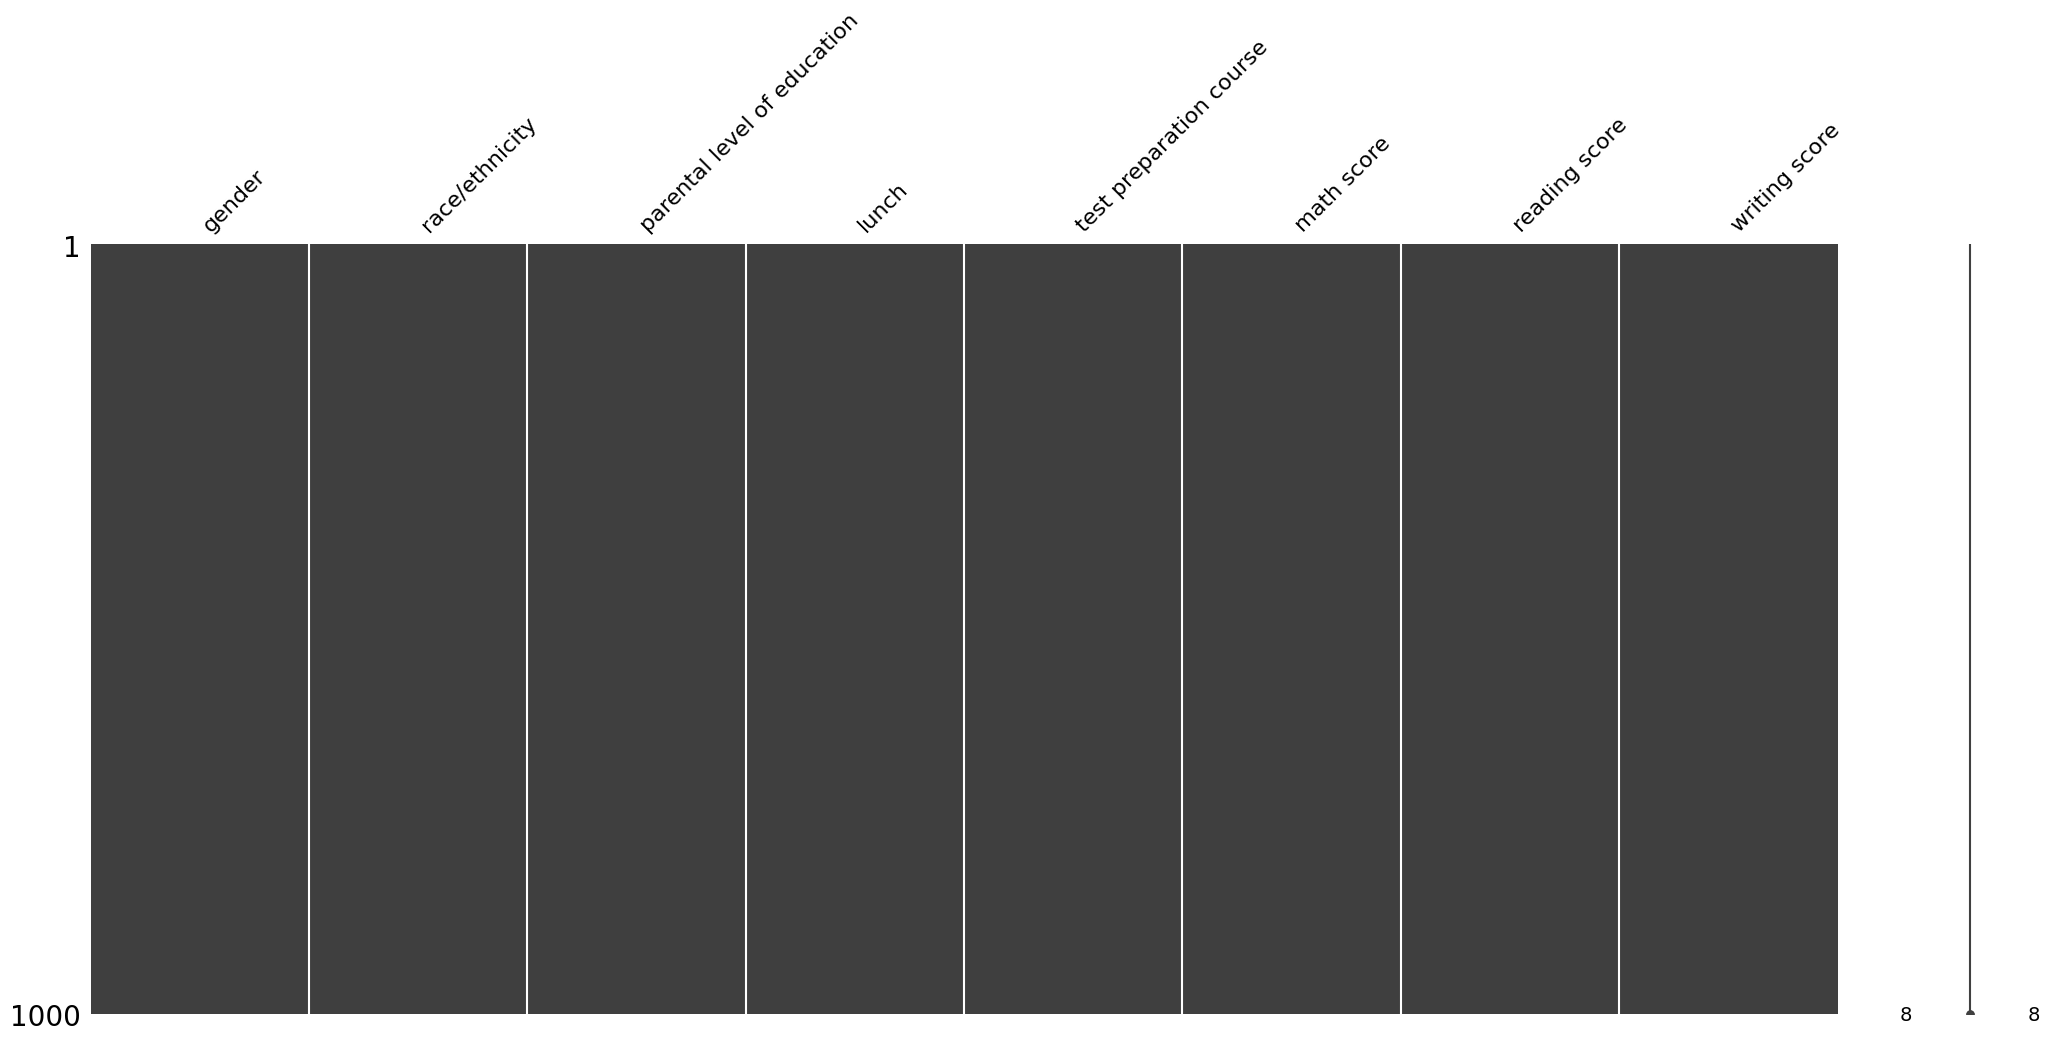

In [14]:
msno.matrix(df);

In [15]:
df.isna().sum()
# therer are no missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Data preparation

In [16]:
## initialize the pass mark (minimum score to pass)
passmark=35

In [17]:
#we create 3 new columns
df['Percentage']=(df['math score']+df['reading score']+df['writing score'])/3

In [18]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [19]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


In [20]:
df.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


## Data visualization

In [21]:
sns.set_theme(style='whitegrid')

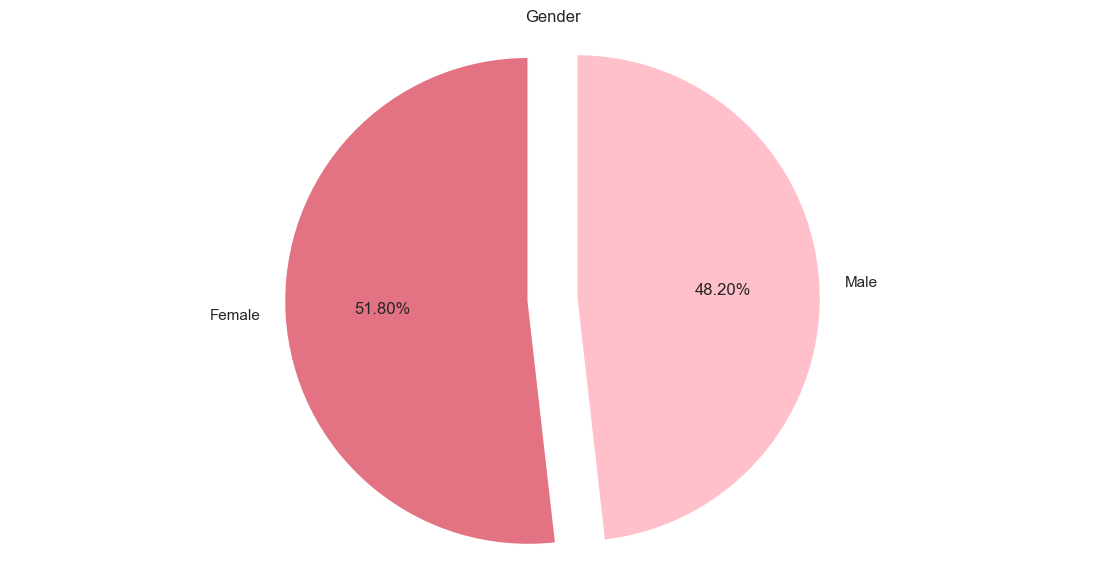

In [22]:
plt.figure(figsize=(14,7))
labels=['Female','Male']
plt.pie(df['gender'].value_counts(), labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

## Student Academic Performance Analysis

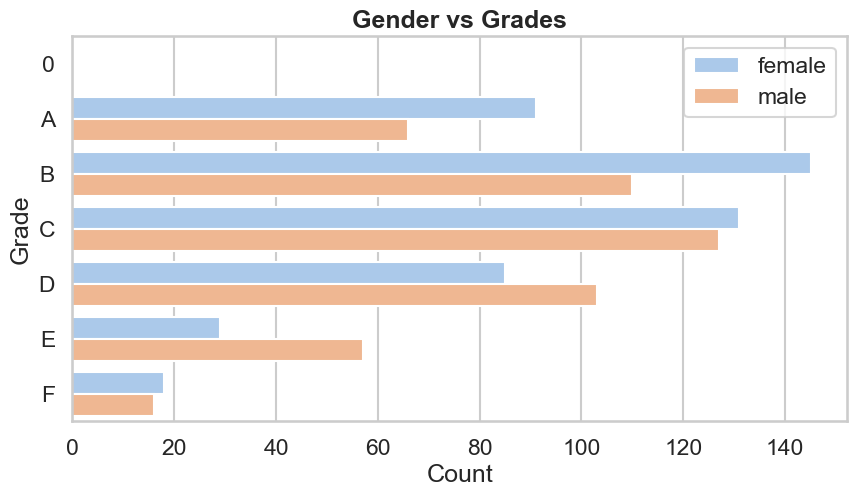

In [30]:
plt.figure(figsize=(10,5))
sns.set_context('talk',font_scale=1)
sns.set_palette('pastel')
ax=sns.countplot(data=df,y='grade', hue='gender', order=['0','A','B','C','D','E','F'])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades',fontsize=18, fontweight='bold')
ax.set(xlabel='Count',ylabel='Grade')
plt.show()

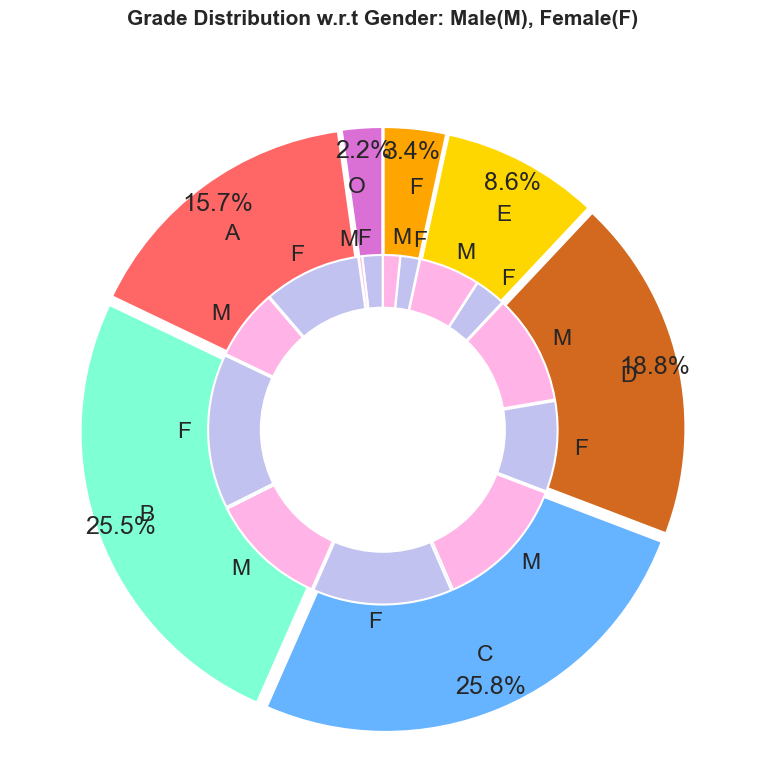

In [31]:
plt.figure(figsize=(8, 8))
labels =["O","A","B","C","D","E","F"]
values = [22,157,255,258,188,86,34]
labels_gender = ["F","M","F","M","F","M","F","M","F","M","F","M","F","M"]
sizes_gender = [19,3,91,66,145,110,131,127,85,103,29,57,18,16]
colors = ['orchid', '#ff6666', 'aquamarine', '#66b3ff','chocolate','gold','orange']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3,0.3,0.3,0.3,0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%' ,pctdistance=0.92, labeldistance=0.80,colors=colors, startangle=90,frame=True, explode=explode,radius=12)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7)
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold',y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

## Correlation analysis

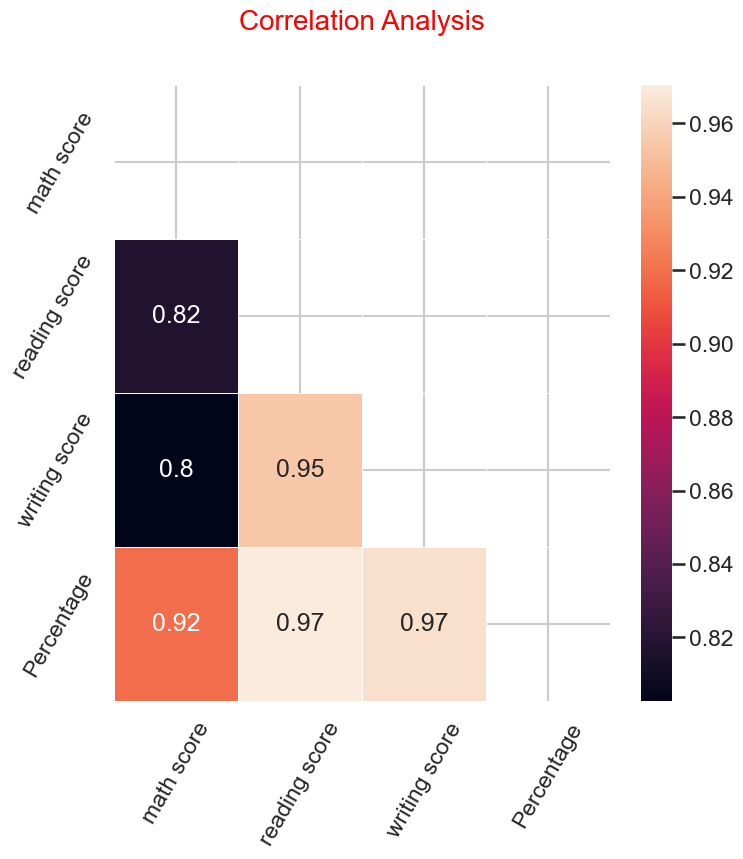

In [37]:
#print(df.corr(numeric_only=True))


plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='red',fontsize=20,pad=40)

corr=df.corr(numeric_only=True)
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(df.corr(numeric_only=True),mask=mask,annot=True,linewidths=0.5)

plt.xticks(rotation=60)
plt.yticks(rotation=60)

plt.show()

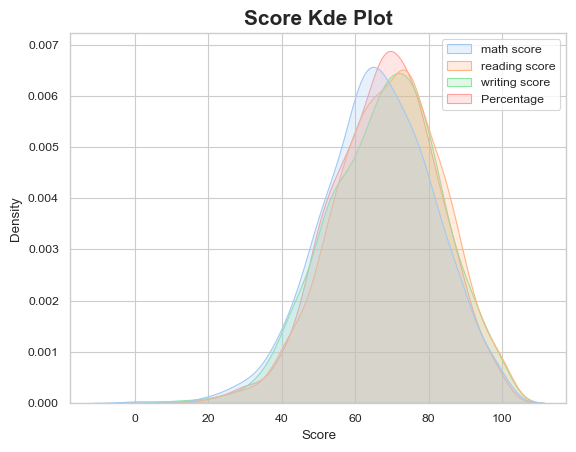

In [41]:
sns.set_context('paper',font_scale=1)
sns.kdeplot(data=df,shade=True)
plt.xlabel('Score')
plt.title('Score Kde Plot',fontsize=15, fontweight='bold')
plt.show()

## Reading vs. Mathematics

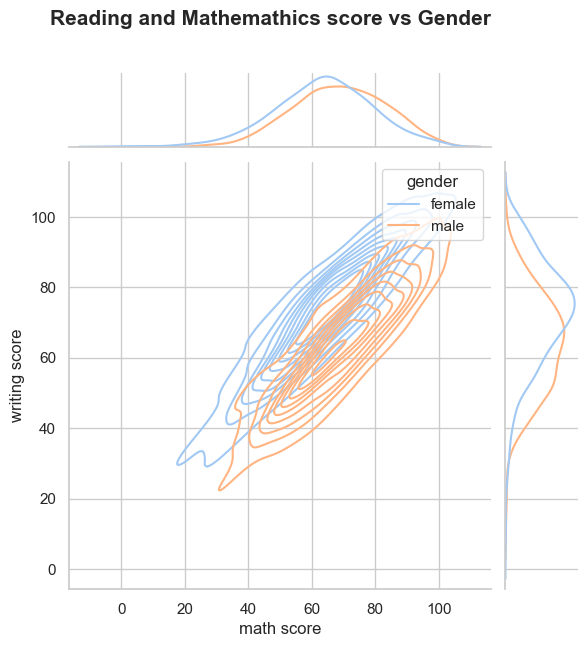

In [43]:
sns.set_context('notebook')
sns.jointplot(data=df,x='math score',y='writing score',hue='gender',kind='kde')
plt.title('Reading and Mathemathics score vs Gender',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## Writing vs Matematics


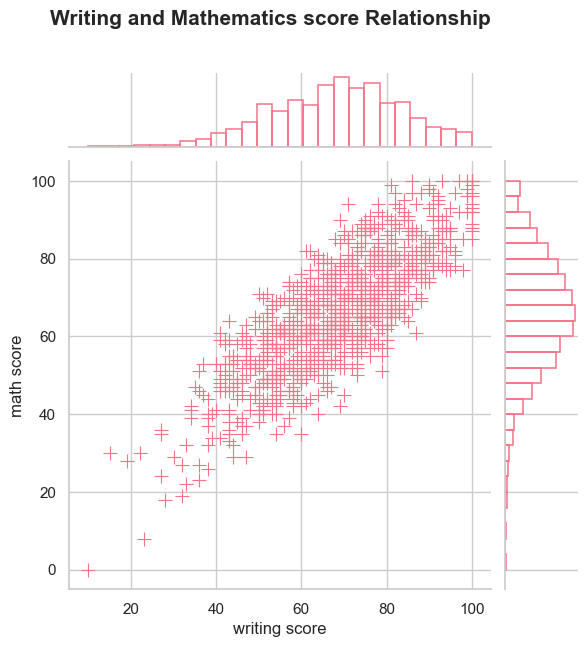

In [45]:
sns.set_palette('husl',9)
sns.jointplot(data=df,x='writing score',y='math score',marker='+',s=100,marginal_kws=dict(bins=25,fill=False))
plt.title('Writing and Mathematics score Relationship',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## Reading vs. Writing

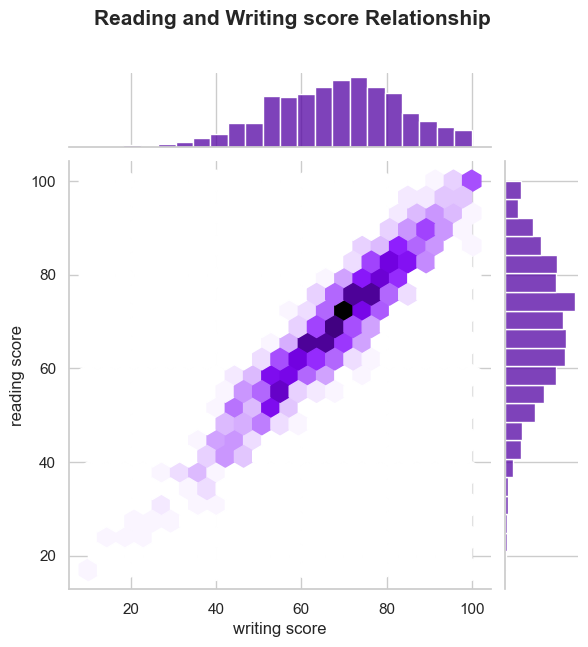

In [47]:
sns.set_palette('plasma')
sns.jointplot(data=df,x='writing score',y='reading score',kind='hex')
plt.title('Reading and Writing score Relationship',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## Percentage vs. Mathematics

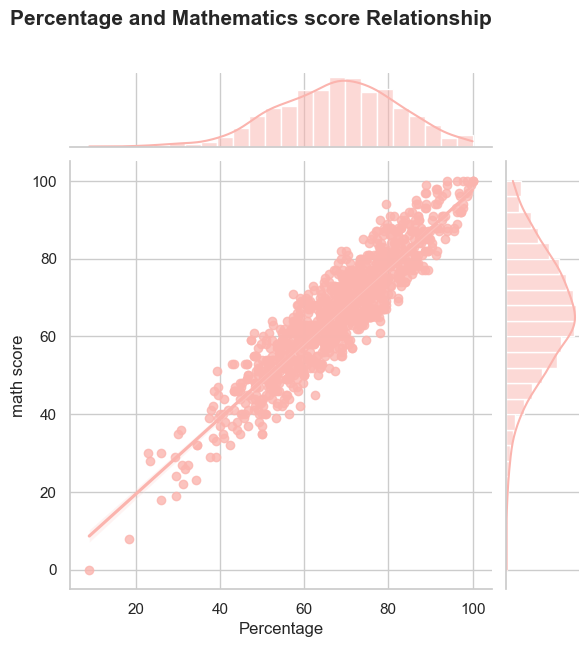

In [51]:
sns.set_palette('Pastel1')
sns.jointplot(data=df,x='Percentage',y='math score',kind='reg')
plt.title('Percentage and Mathematics score Relationship',fontsize=15,fontweight='bold',y=1.3,loc='right')
plt.show()

## Percentaje vs Writing

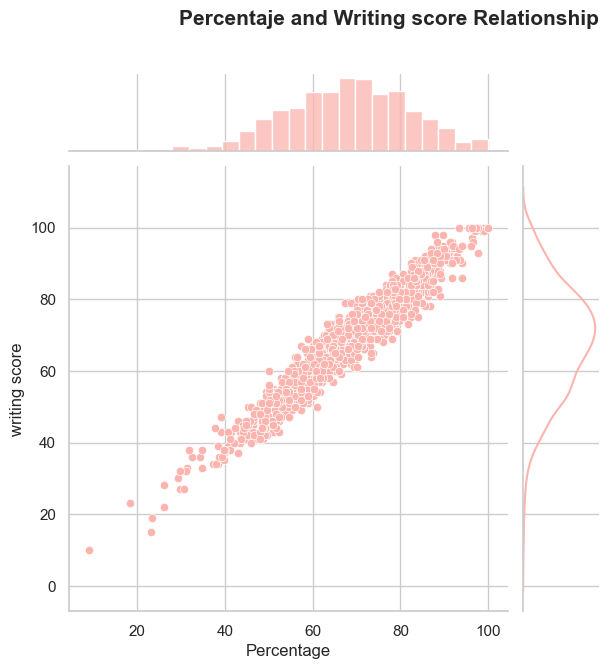

In [55]:
g=sns.JointGrid()
x,y=df['Percentage'],df['writing score']
sns.scatterplot(x=x,y=y,ax=g.ax_joint)
sns.histplot(x=x,ax=g.ax_marg_x)
sns.kdeplot(y=y,ax=g.ax_marg_y)
plt.title('Percentaje and Writing score Relationship',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## Percentage vs Reading


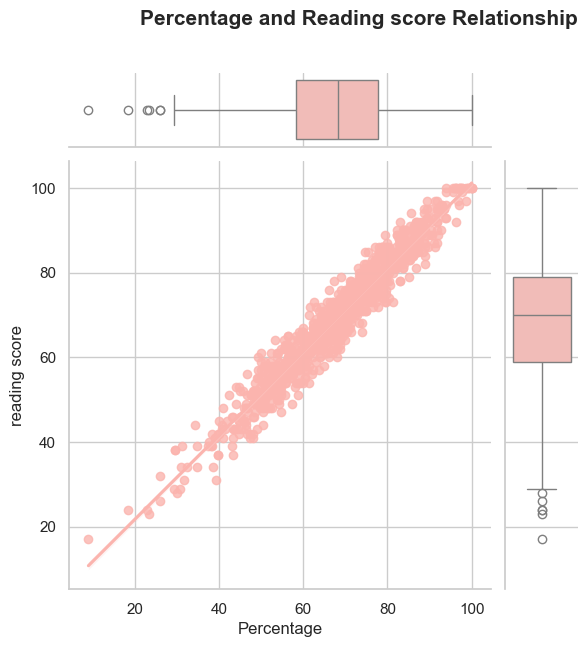

In [57]:
g=sns.JointGrid(data=df,x='Percentage',y='reading score')
g.plot(sns.regplot,sns.boxplot)
plt.title('Percentage and Reading score Relationship',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## Percentage vs Test Preparation

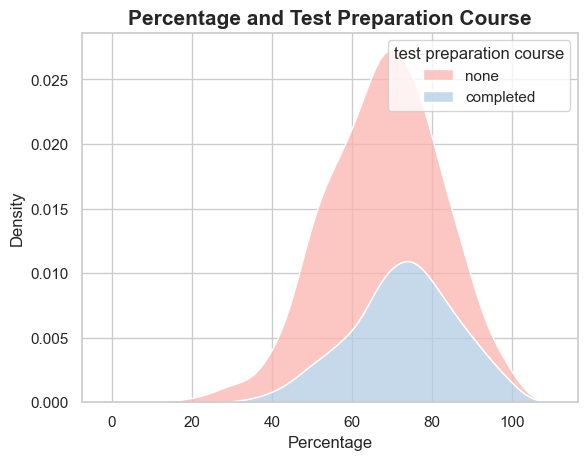

In [62]:
sns.kdeplot(data=df,x='Percentage',hue='test preparation course',multiple='stack')
plt.title('Percentage and Test Preparation Course',fontsize=15, fontweight='bold')
plt.show()

## Percentage and Mathematics vs. Test Preparation

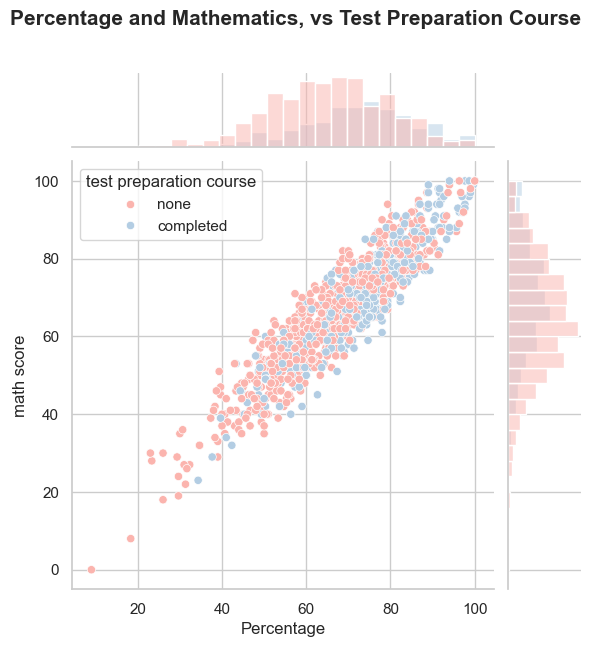

In [67]:
g=sns.JointGrid(data=df,x='Percentage',y='math score', hue='test preparation course')
g.plot(sns.scatterplot,sns.histplot)
plt.title('Percentage and Mathematics, vs Test Preparation Course',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## Percentage vs Lunch kde Plot

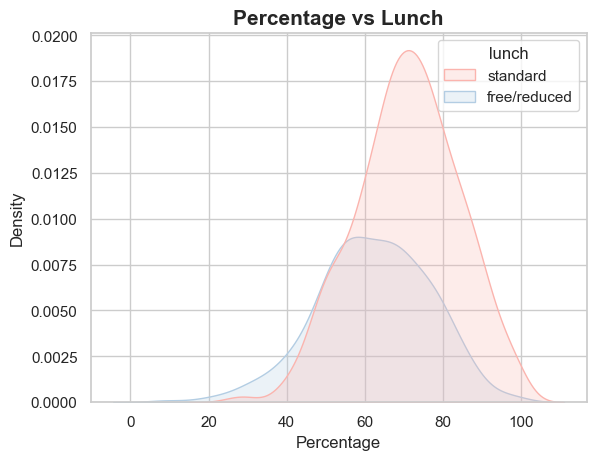

In [71]:
sns.kdeplot(data=df, x='Percentage',hue='lunch',fill=True)
plt.title('Percentage vs Lunch',fontsize=15, fontweight='bold')
plt.show()

## Percentage and Writing Score vs Lunch

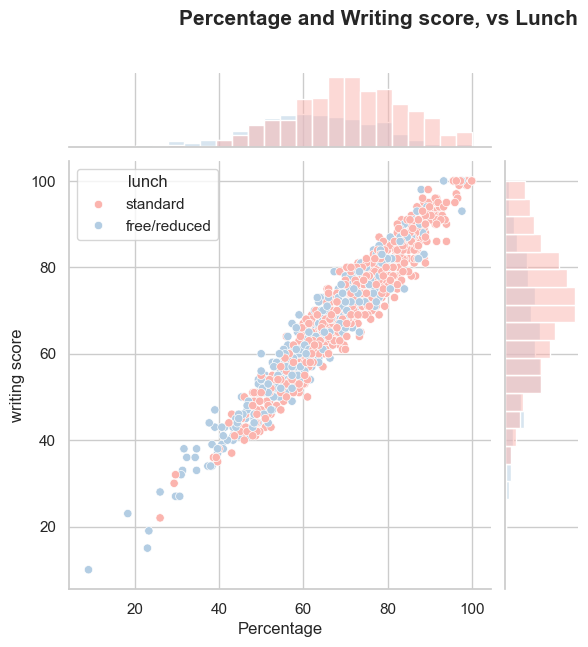

In [73]:
g=sns.JointGrid(data=df,x='Percentage',y='writing score', hue='lunch')
g.plot(sns.scatterplot,sns.histplot)
plt.title('Percentage and Writing score, vs Lunch',fontsize=15, fontweight='bold',y=1.3,loc='right')
plt.show()

## filtering data


In [74]:
df.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B


In [76]:
df[(df['race/ethnicity']=='group B')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
...,...,...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,B
976,male,group B,some college,free/reduced,completed,60,62,60,60.666667,D
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,F
982,male,group B,some high school,standard,completed,79,85,86,83.333333,A


In [77]:
df['grade'].value_counts()

grade
C    258
B    255
D    188
A    157
E     86
F     34
O     22
Name: count, dtype: int64

In [78]:
df['grade'].index.sort_values()

RangeIndex(start=0, stop=1000, step=1)

In [79]:
df[df['grade']=='F'].groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
gender,,,,,,,,,
female,18,18,18,18,18,18,18,18,18
male,16,16,16,16,16,16,16,16,16


In [80]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

## Percentage distribution w.r.t Gender

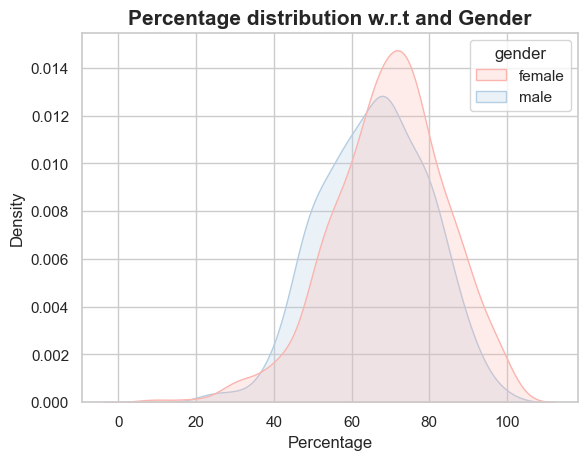

In [82]:
sns.kdeplot(data=df,x='Percentage',hue='gender',fill=True)
plt.title('Percentage distribution w.r.t and Gender',fontsize=15, fontweight='bold')
plt.show()

In [83]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage', 'grade'],
      dtype='object')

## Percentage vs. Parental level of education

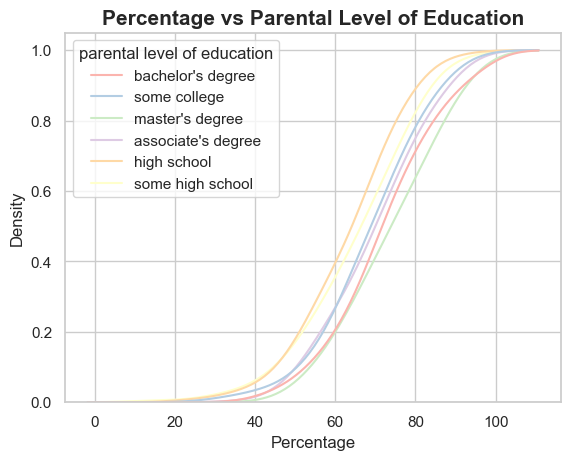

In [89]:
sns.kdeplot(data=df,x='Percentage',hue='parental level of education',cumulative=True, common_norm=False, common_grid=True)
plt.title('Percentage vs Parental Level of Education',fontsize=15, fontweight='bold')
plt.show()

## Parental Education Distirbution vs. Gender

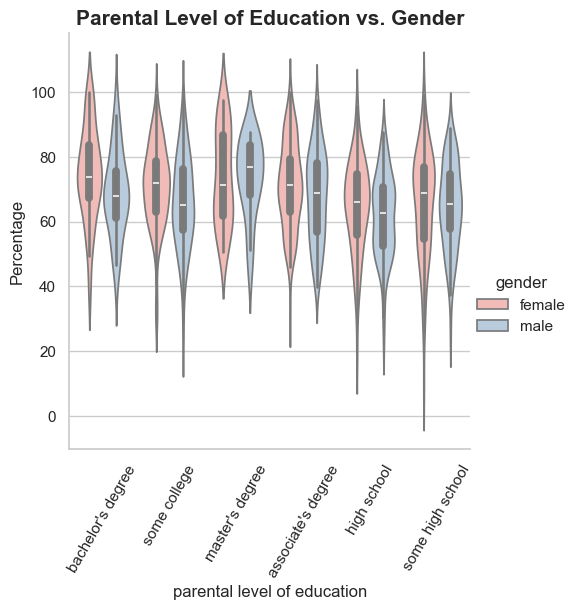

In [92]:
sns.catplot(data=df,x='parental level of education',y='Percentage',hue='gender',kind='violin')
plt.title('Parental Level of Education vs. Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()